In [1]:
from random import choice, randint
# count how many infected
def count_and_print_daily_report(people):
    infected = 0
    non_infected = 0
    for p in people:
        if p.is_infected == True:
            infected += 1
        else:
            non_infected += 1
        
    print(f'day {day} infected = {infected:7d}, non-infected = {non_infected:7d}')

infection_ratio = [True]*7 + [False]*3
class Person:
    def __init__(self, i=False, p=False):
        self.is_infected = i
        self.protected = p
    # what will happened to "other" person if "self" touched him?        
    def touch(self, other):
        if self.is_infected:
            #both protected
            if self.protected and other.protected:                
                self.is_infected = True
                other.is_infected = False
            
            # both are not protected
            elif (not self.protected) and (not other.protected): 
                self.is_infected = True
                other.is_infected = True
            
            # 1 of them is not protected
            else: 
                self.is_infected = True                
                other.is_infected = choice( infection_ratio )
        
        # self is not infected
        else:
            pass
                
    def __str__(self):
        return f"{self.is_infected}"
    
jeddah_people = []
p = Person(True, False)
jeddah_people.append(p)
# create 1K people
number_of_people = 10000
protection_ratio = [True]*80 + [False]*20
for i in range(number_of_people):    
    p = Person( )
    p.is_infected =  False
    p.protected = choice(protection_ratio)
    jeddah_people.append(p)
    
data = []

for day in range(1,15):
    for person_index in range(number_of_people):
        for i in range(1):            
            p1 = jeddah_people[ person_index ]
            ri = randint(0,number_of_people-1)
            p2 = jeddah_people[ ri ]
            p1.touch( p2 )
            p2.touch( p1 )
    count_and_print_daily_report(jeddah_people)
    data.append(jeddah_people)

day 1 infected =       2, non-infected =    9999
day 2 infected =       3, non-infected =    9998
day 3 infected =       6, non-infected =    9995
day 4 infected =       9, non-infected =    9992
day 5 infected =      17, non-infected =    9984
day 6 infected =      37, non-infected =    9964
day 7 infected =      82, non-infected =    9919
day 8 infected =     152, non-infected =    9849
day 9 infected =     270, non-infected =    9731
day 10 infected =     481, non-infected =    9520
day 11 infected =     877, non-infected =    9124
day 12 infected =    1424, non-infected =    8577
day 13 infected =    2094, non-infected =    7907
day 14 infected =    2807, non-infected =    7194


In [116]:
import pandas as pd
df = pd.DataFrame({'Day': [1, 2, 3 , 4, 5 , 6, 7, 8 , 9 ,10 , 11, 12 ,13 ,14],

                   'infected': [4, 5, 10 , 15, 28, 59, 124, 231, 437, 733, 1213, 1855, 2567, 3188],

                   'non-infected': [9997, 9996, 9991, 9986, 9973, 9943, 9887, 9770, 9564, 9268, 8788, 8146, 7434, 6813]})

df.to_csv(index=True)

df.head()

,Day,infected,non-infected
0,1,4,9997
1,2,5,9996
2,3,10,9991
3,4,15,9986
4,5,28,9973


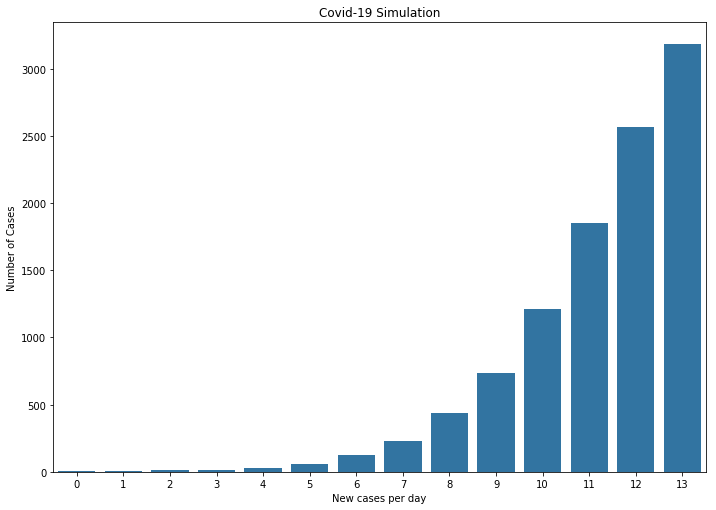

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

start_st = df.infected
base_color = sb.color_palette()[0]
plt.figure(figsize=[ 11.69, 8.27])
ax = sb.barplot(data = df, x = df.infected.index, y = df.infected, color = base_color)
ax.set_title('Covid-19 Simulation')
plt.ylabel('Number of Cases')
plt.xlabel('New cases per day')
plt.show()

In [239]:
import pandas as pd
#www.kaggle.com/sudalairajkumar/covid19-in-italy#covid19_italy_province.csv
italy = pd.read_csv('covid19_italy_province.csv')
italy["Date"]= pd.to_datetime(italy["Date"]) 

In [119]:
italy.describe()

,SNo,RegionCode,ProvinceCode,Latitude,Longitude,TotalPositiveCases
count,4096.00000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000
mean,2047.50000,10.140625,207.523438,35.868843,10.112000,177.958984
std,1182.55768,5.915130,347.425441,16.073486,5.098215,562.747387
min,0.00000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1023.75000,5.000000,32.750000,38.848542,8.583304,0.000000
50%,2047.50000,9.000000,64.500000,42.609815,11.188560,13.000000
75%,3071.25000,15.250000,96.250000,44.947714,13.593962,109.000000
max,4095.00000,20.000000,999.000000,46.499335,18.171897,7458.000000


In [189]:


cases = italy[ (italy['TotalPositiveCases'] >= 1)]
cases = cases.drop(['ProvinceCode','ProvinceName', 'ProvinceAbbreviation', 'Latitude', 'Longitude' ], axis=1)
 


In [190]:
cases['RegionName'] = cases['RegionName'].replace({"Valle d'Aosta":'Valle', 'Friuli Venezia Giulia':'Giulia',
                                           'Emilia Romagna': 'Romagna', 'P.A. Bolzano': 'Bolzano'})

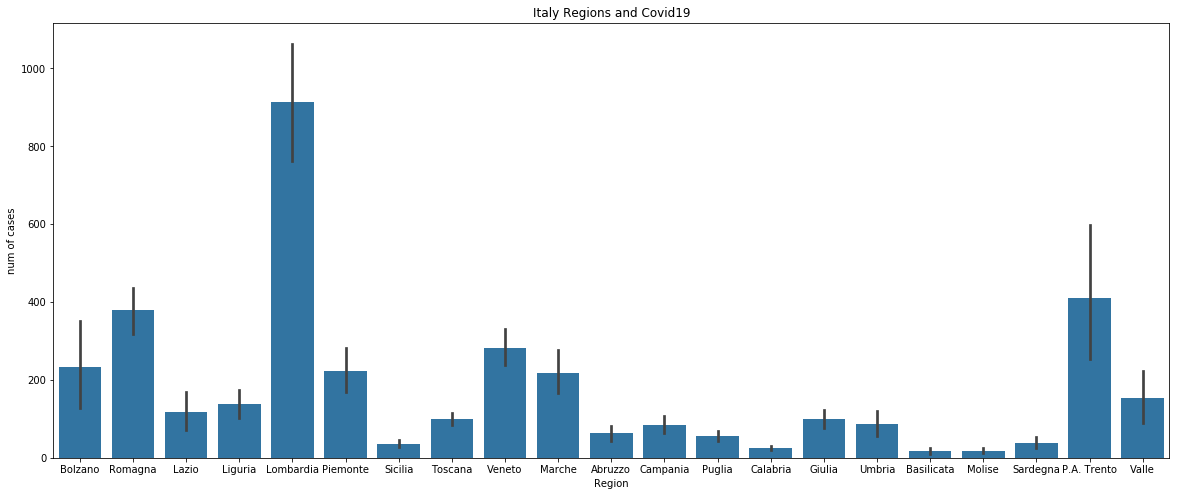

In [191]:
plt.figure(figsize=[ 20, 8])
base_color = sb.color_palette()[0]
ax = sb.barplot(data = cases, x = 'RegionName', y = 'TotalPositiveCases', color = base_color);
ax.set(xlabel='Region', ylabel='num of cases');
ax.set_title('Italy Regions and Covid19');

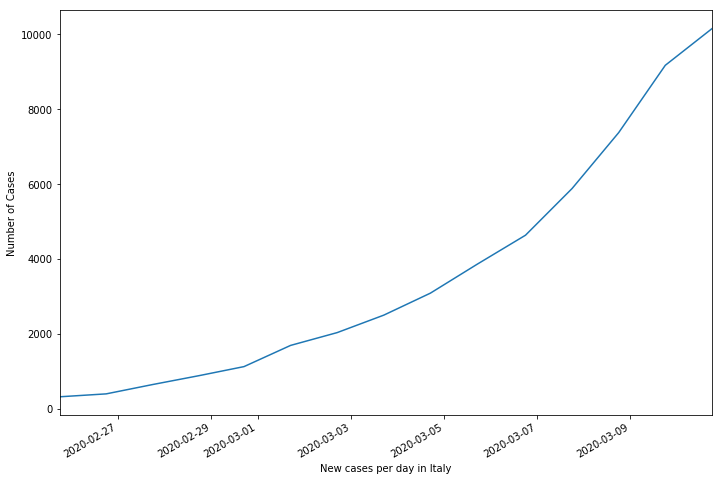

In [241]:
plt.figure(figsize=[ 11.69, 8.27])
numz= cases.groupby("Date")
num = cases.groupby("Date")["TotalPositiveCases"].sum().head(15).sort_index().plot.line()
plt.ylabel('Number of Cases')
plt.xlabel('New cases per day in Italy')
plt.show()

<Figure size 1440x1440 with 0 Axes>

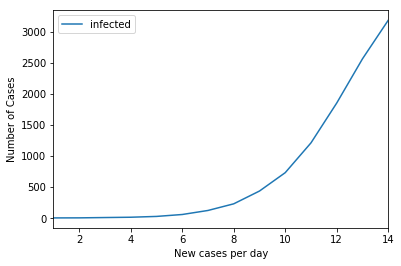

In [209]:
plt.figure(figsize=[ 20, 20])
df.plot(x='Day', y='infected')
plt.ylabel('Number of Cases')
plt.xlabel('New cases per day')
plt.show()

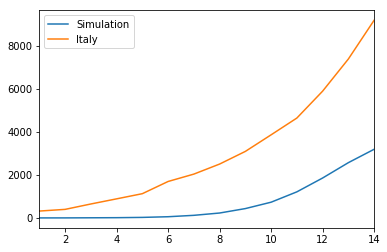

In [238]:
df4 = pd.DataFrame({

   'Simulation': [4, 5, 10 , 15, 28, 59, 124, 231, 437, 733, 1213, 1855, 2567, 3188],

   'Italy': [322,400, 650, 888, 1128, 1694, 2036, 2502, 3089, 3858, 4636,5883, 7375, 9172]

   }, index=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12 ,13 ,14])

lines = df4.plot.line()

In [240]:

numz = cases.groupby("Date")["TotalPositiveCases"].sum()
numz

Date
2020-02-25 18:00:00      322
2020-02-26 18:00:00      400
2020-02-27 18:00:00      650
2020-02-28 18:00:00      888
2020-02-29 17:00:00     1128
2020-03-01 17:00:00     1694
2020-03-02 17:00:00     2036
2020-03-03 17:00:00     2502
2020-03-04 17:00:00     3089
2020-03-05 17:00:00     3858
2020-03-06 18:00:00     4636
2020-03-07 18:00:00     5883
2020-03-08 18:00:00     7375
2020-03-09 18:00:00     9172
2020-03-10 18:00:00    10149
2020-03-11 17:00:00    12462
2020-03-12 17:00:00    15113
2020-03-13 17:00:00    17660
2020-03-14 17:00:00    21157
2020-03-15 17:00:00    24747
2020-03-16 17:00:00    27980
2020-03-17 17:00:00    31506
2020-03-18 17:00:00    35713
2020-03-19 17:00:00    41035
2020-03-20 17:00:00    47021
2020-03-21 17:00:00    53578
2020-03-22 17:00:00    59138
2020-03-23 17:00:00    63927
2020-03-24 17:00:00    69176
2020-03-25 17:00:00    74386
2020-03-26 17:00:00    80539
Name: TotalPositiveCases, dtype: int64